## California House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california=fetch_california_housing()

In [4]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing The Dataset

In [6]:
dataset = pd.DataFrame(california.data,columns=california.feature_names)

In [7]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
dataset['Price']=california.target

In [9]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
## Summarizing The Stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
## Check the missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

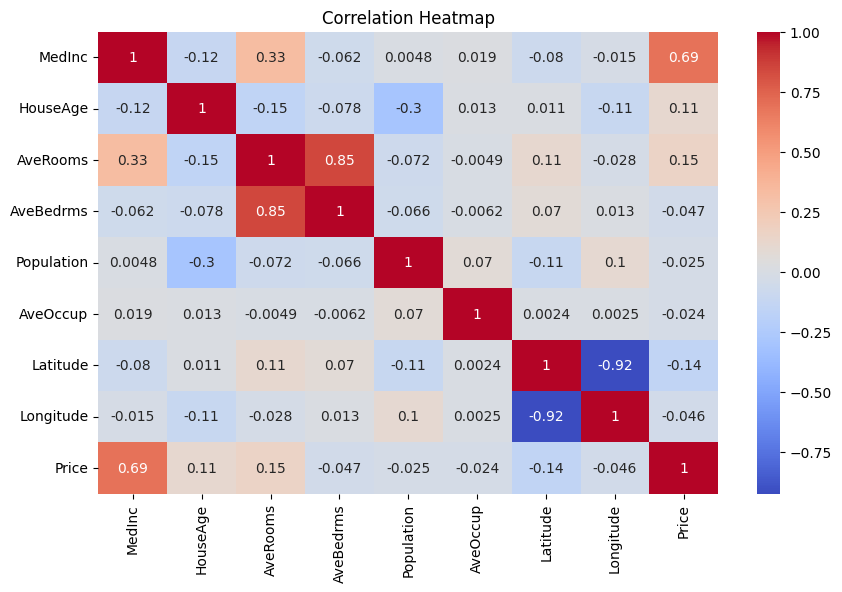

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#Feature Engineering
dataset['Bedrooms_per_room'] = dataset['AveBedrms']/dataset['AveRooms']

In [15]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.224625
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.215208
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.215173
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.219892


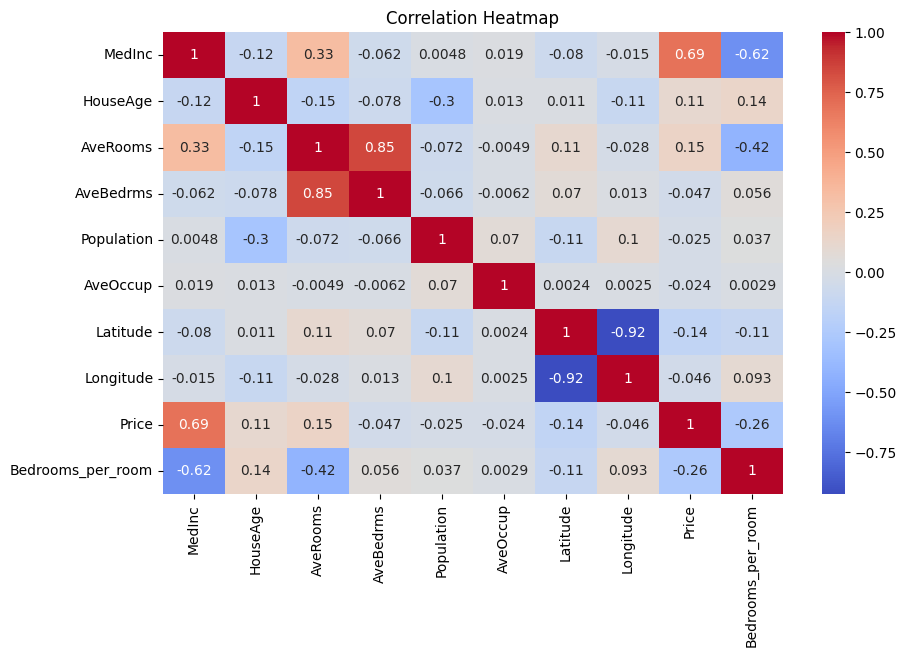

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col]>=lower) & (df[col]<=upper)]
    return df

In [18]:
#STD
def remove_outliers_std(df, columns, n_std=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower = mean - n_std * std
        upper = mean + n_std * std
        df = df[(df[col]>=lower) & (df[col])<=upper]
    return df

In [19]:
column_list = dataset.columns.tolist()

In [20]:
column_list

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'Price',
 'Bedrooms_per_room']

In [21]:
df_cleaned_iqr = remove_outliers_iqr(dataset.copy(), column_list)
print("After removing outlier, shape: ",df_cleaned_iqr.shape)

After removing outlier, shape:  (15797, 10)


In [22]:
df_cleaned_iqr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Bedrooms_per_room
count,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000
mean,3.696128,29.331898,5.213078,1.046044,1274.767298,2.869449,35.694291,-119.639712,1.918891,0.207924
std,1.421468,12.171073,0.977921,0.065535,629.236322,0.616440,2.147680,2.000877,0.933236,0.041843
min,0.536000,1.000000,2.768041,0.869822,5.000000,1.244556,32.540000,-124.350000,0.225000,0.117907
25%,2.613300,19.000000,4.491049,1.002217,817.000000,2.444724,33.930000,-121.820000,1.178000,0.176759
50%,3.531300,30.000000,5.172535,1.042589,1160.000000,2.817582,34.400000,-118.770000,1.772000,0.201644
75%,4.611100,37.000000,5.866817,1.087404,1634.000000,3.243750,37.740000,-118.020000,2.488000,0.234599
max,8.011300,52.000000,8.273632,1.232975,3183.000000,4.571046,41.950000,-114.570000,4.676000,0.328851


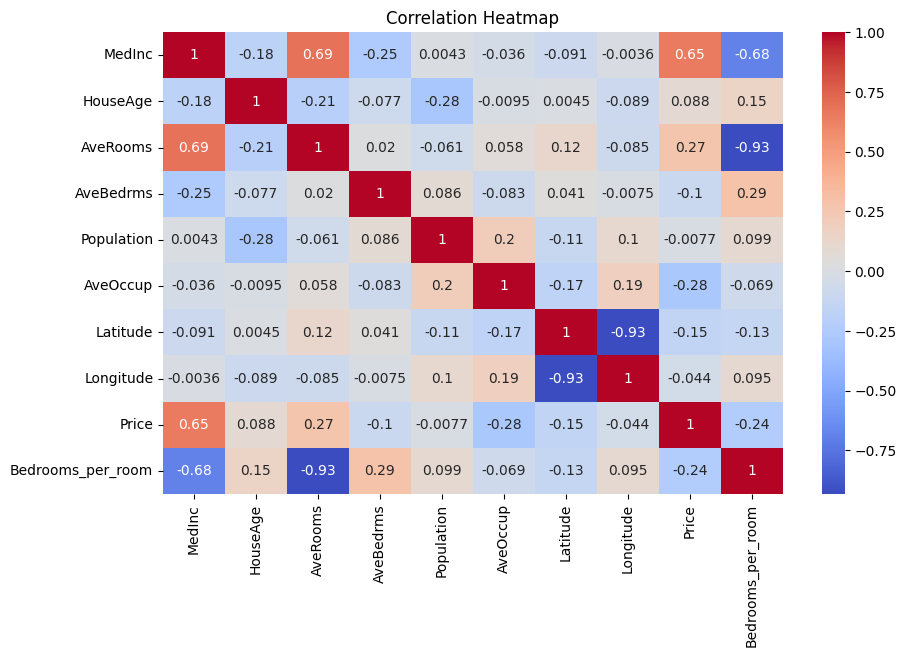

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned_iqr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
## Independent and Dependent features
#X = dataset.drop(dataset['price'], axis=1)
X=df_cleaned_iqr.drop(['Price'], axis=1) 
y=df_cleaned_iqr['Price']

In [25]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bedrooms_per_room
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.172096
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,0.231774
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,0.192899
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,0.221327
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,0.169383
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.224625
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.215173
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.219892


In [26]:
y

3        3.413
4        3.422
5        2.697
6        2.992
7        2.414
         ...  
20634    1.168
20635    0.781
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 15797, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bedrooms_per_room
12089,5.1045,14.0,7.395498,1.077170,1001.0,3.218650,33.87,-117.33,0.145652
2891,1.2618,32.0,3.830409,0.997076,2375.0,3.472222,35.39,-118.98,0.260305
10129,5.4617,17.0,5.487850,1.037383,1381.0,2.581308,33.92,-117.89,0.189033
8272,2.9384,38.0,4.301862,1.022606,1284.0,1.707447,33.77,-118.16,0.237713
1952,2.5104,38.0,5.679887,1.090652,882.0,2.498584,38.73,-120.81,0.192020
...,...,...,...,...,...,...,...,...,...
17670,2.3293,28.0,4.071090,0.943128,455.0,2.156398,37.30,-121.87,0.231665
7066,3.4792,34.0,4.624339,1.021164,917.0,2.425926,33.94,-118.03,0.220824
998,5.4324,17.0,5.975831,0.965257,2222.0,3.356495,37.69,-121.80,0.161527
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.219892


In [29]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bedrooms_per_room
5178,2.2500,45.0,4.556962,0.919831,850.0,3.586498,33.94,-118.26,0.201852
349,2.3281,44.0,4.795276,0.976378,763.0,3.003937,37.75,-122.17,0.203612
5190,1.8191,36.0,4.227666,1.063401,1247.0,3.593660,33.93,-118.27,0.251534
10145,4.3103,33.0,5.013189,0.964029,2049.0,2.456835,33.91,-117.90,0.192298
1649,5.1582,26.0,6.155689,1.007984,1557.0,3.107784,37.94,-121.96,0.163748
...,...,...,...,...,...,...,...,...,...
12650,1.8205,42.0,4.436782,0.986590,1597.0,3.059387,38.52,-121.47,0.222366
7593,1.9605,37.0,5.219212,1.088670,1372.0,3.379310,33.90,-118.25,0.208589
9292,4.3182,36.0,5.626250,1.040000,2196.0,2.745000,38.01,-122.45,0.184848
16710,2.9375,29.0,5.281124,1.120482,926.0,3.718876,35.04,-120.47,0.212167


In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
regression.score(X_test, y_test)

0.6445458206503151

In [32]:
regression.coef_

array([ 4.25069533e-01,  1.15800051e-02,  2.51054643e-01, -3.40730557e-01,
        8.16033068e-05, -3.79664398e-01, -3.82939835e-01, -3.84374755e-01,
        8.15491567e+00])

In [33]:
regression.intercept_

-33.97203649990514

In [34]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [35]:
reg_pred

array([1.14906469, 1.48358558, 1.17259446, ..., 2.49410141, 1.83775523,
       2.18772555])

## Assumptions

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.4184066515114276
0.2997449641498454
0.5474896931905161
